In [88]:
%matplotlib inline
import pandas as pd
import scipy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib

df = pd.read_csv('./data/Elite_Long_Range_Passenger.csv')

pd.options.display.float_format = '{:,.2f}'.format

print(df.describe())

            Credits  Range in LY  Credits per LY
count         75.00        75.00           75.00
mean  22,278,229.20    11,874.57        2,021.77
std   19,646,435.54     8,938.62          975.67
min    1,336,000.00     1,099.00          404.79
25%    5,495,490.00     2,759.50        1,109.03
50%   14,515,200.00    14,022.00        2,086.67
75%   36,216,480.00    20,397.00        2,719.65
max   69,450,240.00    30,408.00        4,800.00


## The following is an analysis of 75 long range passenger missions in Elite Dangerous.  A long range mission is one that gives a single location to fly to and that is 1000 LY or farther.  Data was gathered in Elite Dangerous v2.2.

Correlation between credits and LY range:
('r = ', 0.83504745423640381, ' p = ', '0.00000000000000000001')


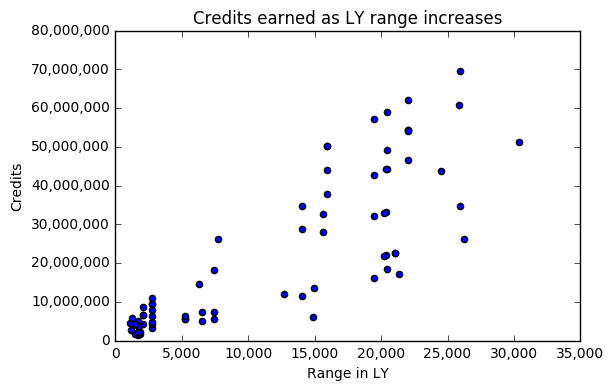

In [89]:
r, p = pearsonr(df['Credits'], df['Range in LY'])
print("Correlation between credits and LY range:")
print("r = ", r, " p = ", '{:.20f}'.format(p))

df.plot(kind='scatter', x='Range in LY', y='Credits', title='Credits earned as LY range increases')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

## There is unsurprisingly a positive correlation between credits and range in LY, r(73) = 0.83, p < 0.01.

Correlation between credit ratio and LY range:
('r = ', -0.20098009712837414, ' p = ', '0.08381006648925232172')


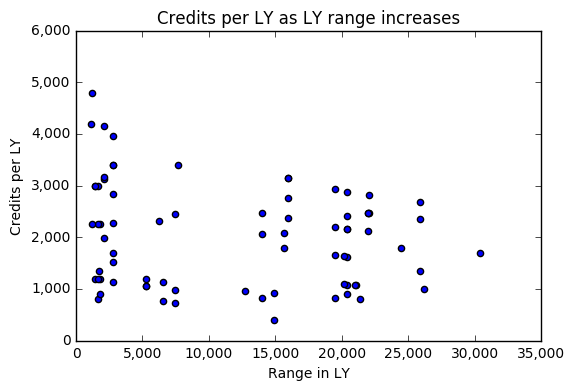

In [90]:
r, p = pearsonr(df['Range in LY'], df['Credits per LY'])
print("Correlation between credit ratio and LY range:")
print("r = ", r, " p = ", '{:.20f}'.format(p))

df.plot(kind='scatter', x='Range in LY', y='Credits per LY', title='Credits per LY as LY range increases')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xlim(0, None)
ax.set_ylim(0, None)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

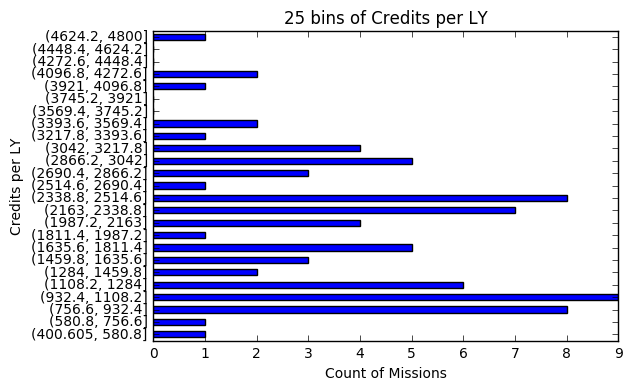

In [91]:
#https://stackoverflow.com/questions/27157522/pandas-plot-histogram-data-frame-index
df['bucket'] = pd.cut(df['Credits per LY'].round(0), bins=25)
newdf = df[['bucket','Credits per LY']].groupby('bucket').size()
newdf.plot(kind='barh', title='25 bins of Credits per LY') #barh - horizontal barplot
ax = plt.gca()
ax.set_ylabel('Credits per LY')
ax.set_xlabel('Count of Missions')

## There are a wide variety of payouts in terms of credits per LY traveled.  If you can find a mission that is close to or over 4000 credits per LY, grab it.  Fly safe cmdr.  o7